<a href="https://colab.research.google.com/github/arafiardnsyh/toyota-stock-analysis/blob/main/toyota_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib seaborn yfinance

from google.colab import files
uploaded = files.upload()  # Upload CSV file


Saving Toyota_Data.csv to Toyota_Data.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Toyota_Data.csv')

# Display the first few rows
print(df.head())
print(df.info())


         Date  Adj Close     Close      High       Low      Open  Volume
0  1980-03-17   2.296798  3.291227  3.344743  3.291227  0.000000   41109
1  1980-03-18   2.306134  3.304606  3.358122  3.304606  0.000000    9343
2  1980-03-19   2.306134  3.304606  3.304606  3.304606  3.304606       0
3  1980-03-20   2.306134  3.304606  3.358122  3.304606  0.000000   10277
4  1980-03-21   2.362154  3.384880  3.438396  3.384880  0.000000    8409
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11291 entries, 0 to 11290
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       11291 non-null  object 
 1   Adj Close  11291 non-null  float64
 2   Close      11291 non-null  float64
 3   High       11291 non-null  float64
 4   Low        11291 non-null  float64
 5   Open       11291 non-null  float64
 6   Volume     11291 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 617.6+ KB
None


In [ ]:
print(df.describe()) #summarize data


          Adj Close         Close          High           Low          Open  \
count  11291.000000  11291.000000  11291.000000  11291.000000  11291.000000   
mean      63.586275     72.057776     72.478879     71.646418     67.955424   
std       52.272225     51.295776     51.552662     50.976716     55.851523   
min        2.259452      3.237711      3.237711      3.237711      0.000000   
25%       19.224636     27.548208     27.735613     27.548208      0.000000   
50%       50.583900     66.040001     66.650002     65.440002     66.000000   
75%      104.705669    114.295002    114.895000    113.625000    114.294998   
max      254.770004    254.770004    255.229996    253.589996    255.000000   

             Volume  
count  1.129100e+04  
mean   2.146604e+05  
std    3.874256e+05  
min    0.000000e+00  
25%    1.350000e+04  
50%    9.100000e+04  
75%    2.923000e+05  
max    1.858270e+07  


In [ ]:
#Check for missing values
print(df.isnull().sum())


Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


In [13]:
# Hapus duplikat jika ada
df = df.drop_duplicates()

# Cek duplikasi
print(df.duplicated().sum())


0


In [14]:
# Menggunakan IQR (Interquartile Range)
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1

# Batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outlier
outliers = df[(df['Close'] < lower_bound) | (df['Close'] > upper_bound)]
print(f"Outliers:\n{outliers}")

# Opsional: Hapus outlier
df = df[(df['Close'] >= lower_bound) & (df['Close'] <= upper_bound)]


Outliers:
             Adj Close       Close        High         Low        Open  Volume
Date                                                                          
2024-03-01  246.039993  246.039993  246.539993  244.559998  244.660004  337500
2024-03-05  248.190002  248.190002  249.990005  246.809998  247.710007  314100
2024-03-06  252.399994  252.399994  253.429993  250.929993  252.149994  331300
2024-03-07  247.940002  247.940002  248.050003  245.699997  246.929993  359800
2024-03-19  244.320007  244.320007  245.089996  242.410004  242.679993  347400
2024-03-20  246.720001  246.720001  246.800003  244.309998  244.679993  214900
2024-03-21  251.479996  251.479996  251.789993  250.259995  251.449997  245500
2024-03-22  254.770004  254.770004  255.229996  253.589996  255.000000  285400
2024-03-25  252.410004  252.410004  253.419998  251.039993  252.110001  196900
2024-03-26  253.720001  253.720001  254.789993  253.389999  253.889999  214900
2024-03-27  252.149994  252.149994  254.19

In [ ]:
# Normalisasi kolom harga dengan Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Open', 'High', 'Low', 'Close']] = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close']])


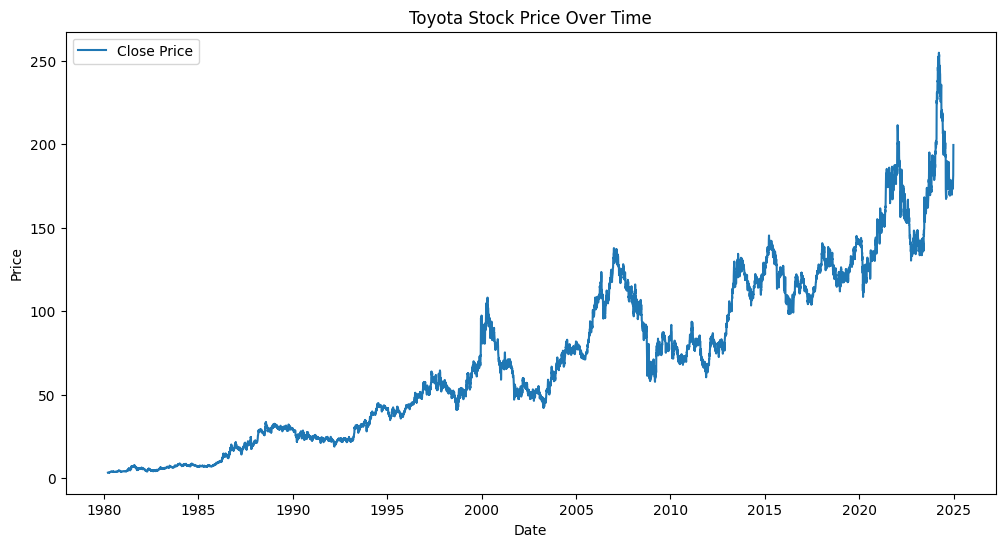

In [35]:
# Load the data again and print first few rows
df = pd.read_csv('Toyota_Data.csv')

#Question 1: Trend Analysis
#Plot stock price trends
df['Date'] = pd.to_datetime(df['Date'])  # Ensure Date is in datetime format
df.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Toyota Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


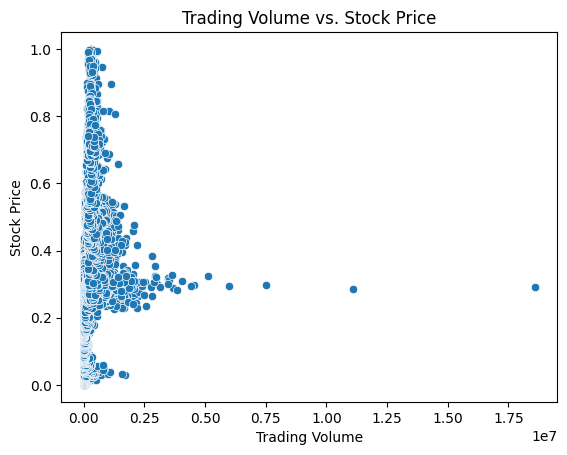

In [16]:
#Question 2: Correlation with Trading Volume
#Scatterplot
sns.scatterplot(x='Volume', y='Close', data=df)
plt.title('Trading Volume vs. Stock Price')
plt.xlabel('Trading Volume')
plt.ylabel('Stock Price')
plt.show()


In [17]:
#Correlation coefficient
correlation = df['Volume'].corr(df['Close'])
print(f"Correlation between Volume and Close Price: {correlation}")


Correlation between Volume and Close Price: 0.3011876129546907


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


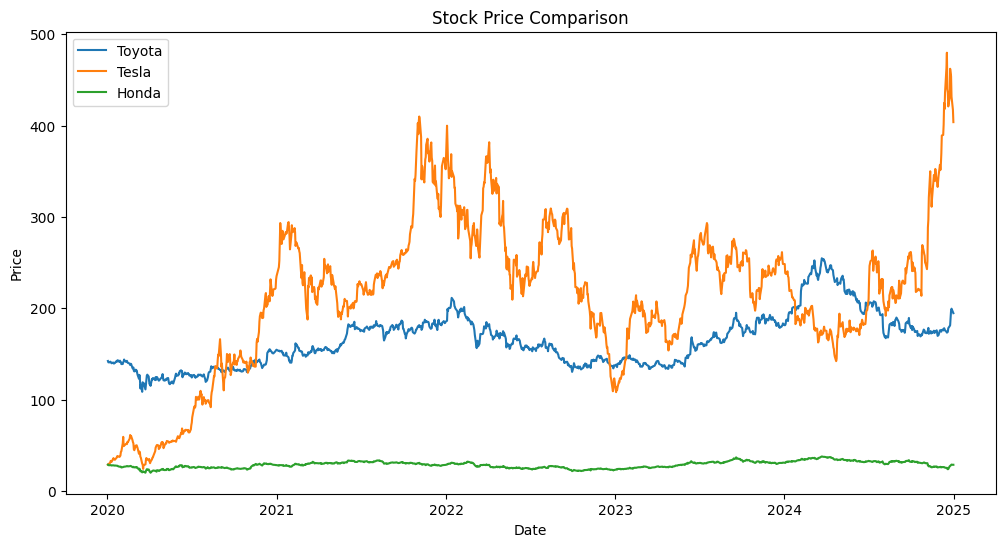

In [18]:
#Question 3: Comparison with Competitors
#Use the yfinance library to fetch competitor data
import yfinance as yf

# Fetch Toyota, Tesla, and Honda stock data
toyota = yf.download('TM', start='2020-01-01', end='2025-01-01')
tesla = yf.download('TSLA', start='2020-01-01', end='2025-01-01')
honda = yf.download('HMC', start='2020-01-01', end='2025-01-01')

# Compare closing prices
plt.figure(figsize=(12, 6))
plt.plot(toyota['Close'], label='Toyota')
plt.plot(tesla['Close'], label='Tesla')
plt.plot(honda['Close'], label='Honda')
plt.title('Stock Price Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
